*dataset : https://finance.yahoo.com/quote/TSLA/history?period1=1277769600&period2=1692489600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true*

# Name: Raj C. Mhatre

*Email id :rmhatre404@gmail.com (mailto:rmhatre404@gmail.com) , contact No.: +91-9768877272*

*Linkedin ID: https://www.linkedin.com/in/raj-c-mhatre-571b67219/*

In [1]:
# Importing all required libraries:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

In [2]:
# Create a dataframe and read the data:

df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
# Sort essential columns for forcasting:

df = df[['Date','Close']]
df

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3303,2023-08-14,239.759995
3304,2023-08-15,232.960007
3305,2023-08-16,225.600006
3306,2023-08-17,219.220001


In [4]:
# As we can see here, 'Date' column has a different datatype:

df['Date']

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
           ...    
3303    2023-08-14
3304    2023-08-15
3305    2023-08-16
3306    2023-08-17
3307    2023-08-18
Name: Date, Length: 3308, dtype: object

In [5]:
# Creating function to convert Date(object) into Date with proper datatype:

import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2023-08-20')
datetime_object

datetime.datetime(2023, 8, 20, 0, 0)

In [6]:
# Reading top 5 data:

df.head()

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [7]:
# Applying function which we created earlier:

df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3303   2023-08-14
3304   2023-08-15
3305   2023-08-16
3306   2023-08-17
3307   2023-08-18
Name: Date, Length: 3308, dtype: datetime64[ns]

In [8]:
# As we can see basic information we needed:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3308 non-null   datetime64[ns]
 1   Close   3308 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.8 KB


In [9]:
# Reading top 5 data:

df.head()

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [10]:
# Use Date column for actual forcasting:

df.index = df.pop('Date')
df

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2023-08-14,239.759995
2023-08-15,232.960007
2023-08-16,225.600006


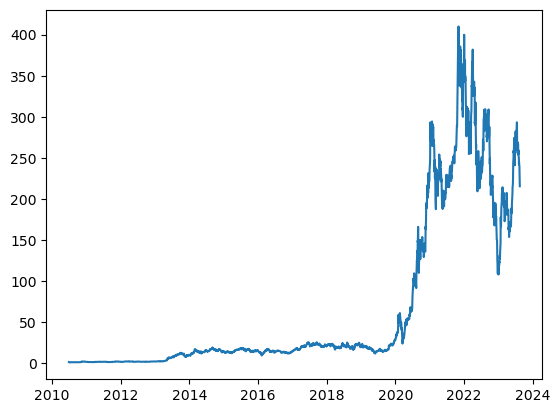

In [11]:
# Visualising stock performance of Tesla till date:

import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [12]:
# Creating function to view last 3days price of stock, so we can find moving avg and all:

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    
    target_date = first_date
    
    dates = []
    X, Y = [], []
    
    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size{n} is too large for date {target_date}')
            return
        
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]
        
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        
        if last_time:
            break
            
        target_date = next_date
        
        if target_date == last_date:
            last_time = True
            
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
    
    ret_df['Target'] = Y
    
    return ret_df

# Start day second time around: '2022-07-01'
windowed_df = df_to_windowed_df(df, 
                                '2022-07-01', 
                                '2023-08-18', 
                                n=3)

windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-07-01,232.663330,228.490005,224.473328,227.263336
1,2022-07-05,228.490005,224.473328,227.263336,233.066666
2,2022-07-06,224.473328,227.263336,233.066666,231.733337
3,2022-07-07,227.263336,233.066666,231.733337,244.543335
4,2022-07-08,233.066666,231.733337,244.543335,250.763336
...,...,...,...,...,...
280,2023-08-14,242.190002,245.339996,242.649994,239.759995
281,2023-08-15,245.339996,242.649994,239.759995,232.960007
282,2023-08-16,242.649994,239.759995,232.960007,225.600006
283,2023-08-17,239.759995,232.960007,225.600006,219.220001


In [13]:
# Creating function to see count of fetched data as above:

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    middle_matrix = df_as_np[:, 1:-1]
    
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((285,), (285, 3, 1), (285,))

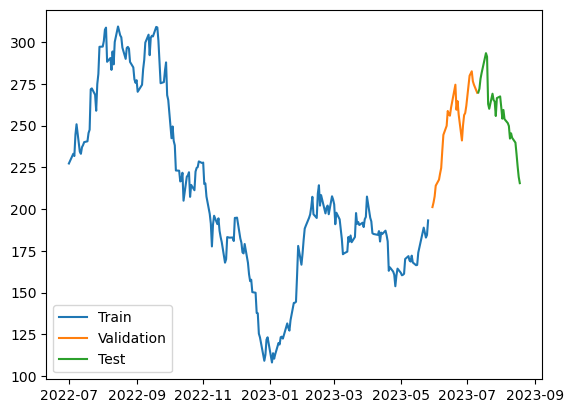

In [14]:
# Visualising the data with splitted format(train, validation, test) for particular timeframe:

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [15]:
# Creating sequential model with the help of LSTMs:

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 40ms/step - loss: 45915.7383 - mean_absolute_error: 207.6692 - val_loss: 61885.4180 - val_mean_absolute_error: 247.6547
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 45685.6992 - mean_absolute_error: 207.1149 - val_loss: 61628.0000 - val_mean_absolute_error: 247.1338
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 45446.2266 - mean_absolute_error: 206.5394 - val_loss: 61291.1250 - val_mean_absolute_error: 246.4510
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 45137.7930 - mean_absolute_error: 205.7800 - val_loss: 60864.4023 - val_mean_absolute_error: 245.5826
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 44710.4844 - mean_absolute_error: 204.7250 - val_loss: 60204.8086 - val_mean_absolute_error: 244.2368
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 44118.7734 - mean_absolute_error: 203.2872 - val_loss: 59448.91

8/8 [==============================] - 0s 4ms/step - loss: 65.0368 - mean_absolute_error: 6.3929 - val_loss: 75.4738 - val_mean_absolute_error: 7.1869
Epoch 50/100
8/8 [==============================] - 0s 3ms/step - loss: 65.4999 - mean_absolute_error: 6.2907 - val_loss: 82.2833 - val_mean_absolute_error: 6.5650
Epoch 51/100
8/8 [==============================] - 0s 4ms/step - loss: 76.1795 - mean_absolute_error: 6.8999 - val_loss: 111.3772 - val_mean_absolute_error: 9.3089
Epoch 52/100
8/8 [==============================] - 0s 3ms/step - loss: 67.8842 - mean_absolute_error: 6.4773 - val_loss: 180.1199 - val_mean_absolute_error: 11.8329
Epoch 53/100
8/8 [==============================] - 0s 3ms/step - loss: 124.6714 - mean_absolute_error: 8.9440 - val_loss: 147.8019 - val_mean_absolute_error: 10.7351
Epoch 54/100
8/8 [==============================] - 0s 3ms/step - loss: 179.1552 - mean_absolute_error: 10.7078 - val_loss: 292.5236 - val_mean_absolute_error: 15.1192
Epoch 55/100
8/8 [=

Epoch 99/100
8/8 [==============================] - 0s 3ms/step - loss: 64.9845 - mean_absolute_error: 6.4291 - val_loss: 68.7155 - val_mean_absolute_error: 6.5392
Epoch 100/100
8/8 [==============================] - 0s 3ms/step - loss: 61.7178 - mean_absolute_error: 6.0832 - val_loss: 75.8041 - val_mean_absolute_error: 7.4689


8/8 [==============================] - 0s 2ms/step


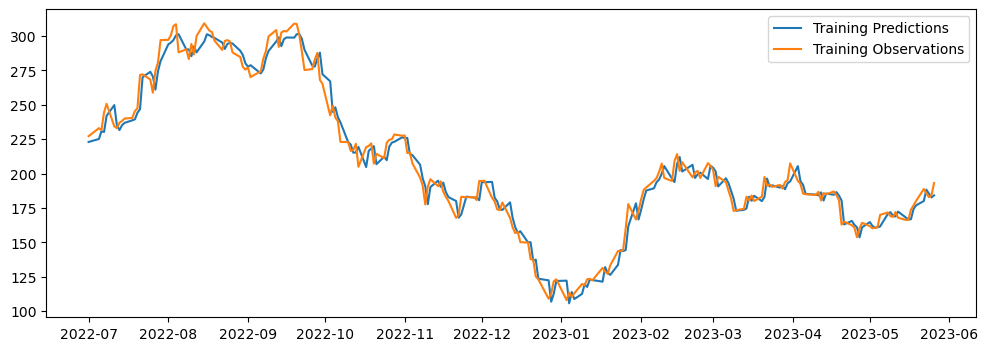

In [16]:
# Visualising stock performance of acutal training data and training prediction:

train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(12,4))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 0s/step


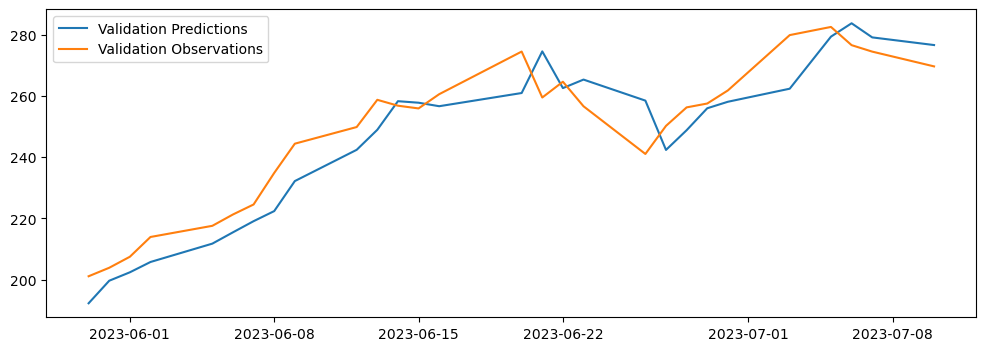

In [17]:
# Visualising stock performance of acutal validation data and validation prediction:

val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(12,4))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 15ms/step


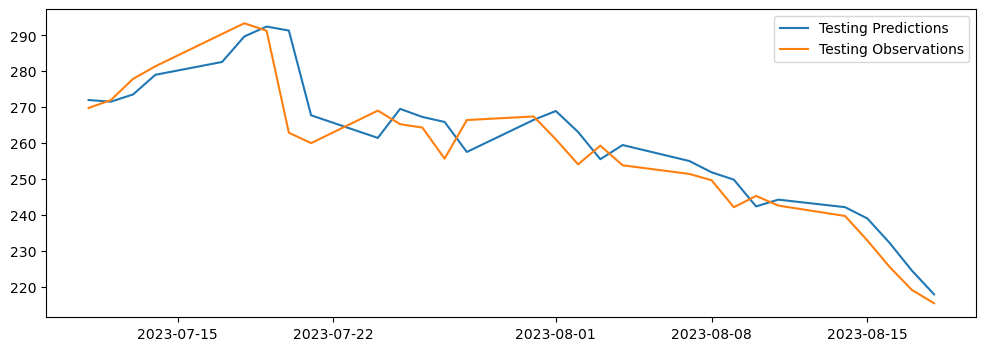

In [18]:
# Visualising stock performance of acutal testing data and testing prediction:

test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(12,4))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

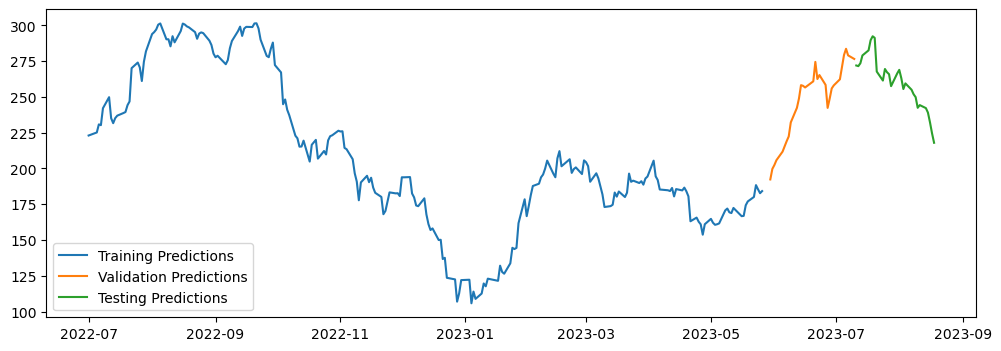

In [19]:
# Visualising stock performance of prediction according LSTMs algorithm:

plt.figure(figsize=(12,4))
plt.plot(dates_train, train_predictions)
plt.plot(dates_val, val_predictions)
plt.plot(dates_test, test_predictions)
plt.legend(['Training Predictions', 
            'Validation Predictions', 
            'Testing Predictions'])

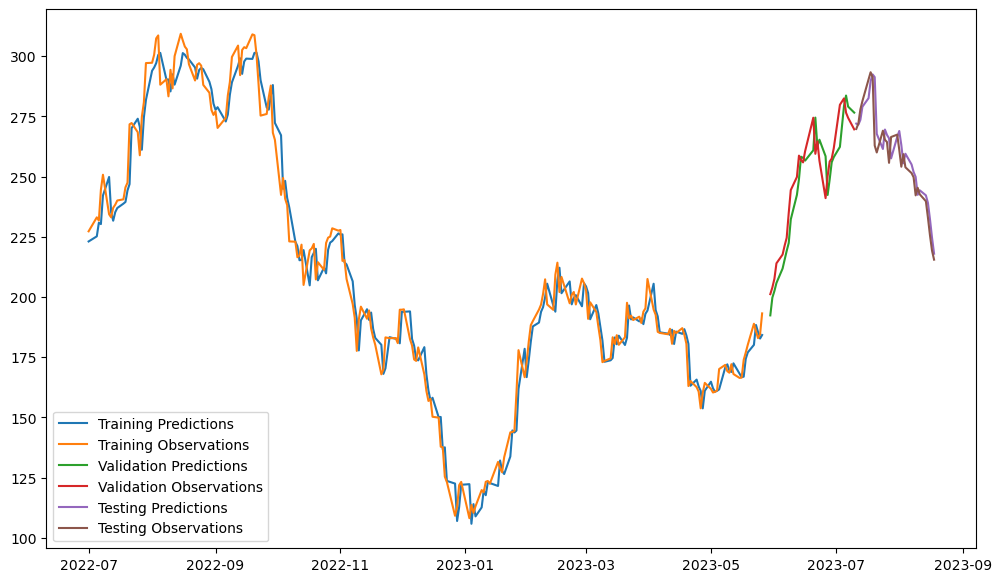

In [20]:
# Visualising stock performance of acutal data and prediction of LSTMs:

plt.figure(figsize=(12,7))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [21]:
# Creating recursive prediction function:

from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 8ms/step


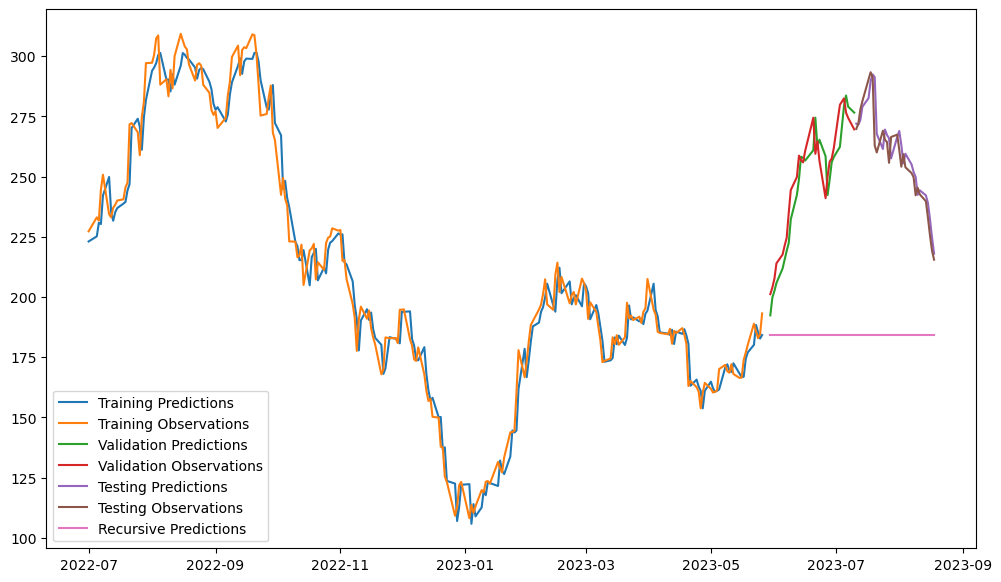

In [22]:
# Visualising stock performance of acutal data and prediction on past data, with Recursive Prediction of stock:

plt.figure(figsize=(12,7))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])